## üìå LSTM Î™®Îç∏ÏùÑ Ïù¥Ïö©Ìïú ÎßùÍ∞Ñ Í∞ÄÍ≤© ÏòàÏ∏°

### ÏÇ¨Ïö©Î≥ÄÏàò : Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò, Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò, ÏãúÏû•Ï†ÑÎßùÏßÄÌëú, Î¨¥Ïó≠ÏàòÏßÄ, ÌôòÏú®, 2Ï∞®Ï†ÑÏßÄ ÏÇ∞ÏóÖÏßÄÏàò 

In [222]:
#!pip install torchvision

In [223]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torchvision.datasets
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [224]:
plt.style.use('seaborn-whitegrid')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)

if torch.cuda.is_available() :
    torch.cuda.manual_seed_all(125)

C:\Users\wandong\AppData\Local\Temp\ipykernel_12140\1616429856.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 1. Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú ÌôïÏù∏

In [225]:
import pandas as pd
import numpy as np
df=pd.read_csv('../../data/final/ÎßùÍ∞Ñdata.csv')
Ï£ºÏãù=pd.read_csv('../../data/final/Ï£ºÏãù.csv',encoding='cp949')
df=pd.merge(df,Ï£ºÏãù,left_on='Í∏∞Ï§ÄÏùº',right_on='Date',how='left')
df=df.iloc[:-2]
df

Í∏∞Ï§ÄÏùº   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close    Í∏∞Ï§ÄÍ∞ÄÍ≤©  \
0    2021-06-09  2407.51  2494.11  1682.47  2193.115993  1116.890015  1445.0   
1    2021-06-10  2436.46  2523.49  1682.47  2227.469874  1116.410034  1445.0   
2    2021-06-11  2452.92  2519.40  1682.47  2284.482995  1111.260010  1445.0   
3    2021-06-14  2498.37  2567.59  1741.94  2315.536776  1115.550049  1445.0   
4    2021-06-15  2496.55  2564.67  1741.94  2315.536776  1116.319946  1445.0   
..          ...      ...      ...      ...          ...          ...     ...   
748  2024-04-22  2946.21  2545.26  1819.96  3154.139607  1373.930054  1080.0   
749  2024-04-23  2929.48  2546.98  1819.96  3081.062858  1378.839966  1080.0   
750  2024-04-24  2886.01  2500.92  1819.96  3043.299367  1370.479980  1080.0   
751  2024-04-25  2895.92  2521.51  1819.96  3021.949758  1376.969971  1080.0   
752  2024-04-26  2917.29  2545.06  1819.96  3037.851922  1371.699951  1080.0   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ...     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
0     49.37    47.48    0.3  ...  0.550586  0.818009  0.000000  0.002092   
1     49.37    47.48    0.3  ...  0.559105  0.827488  0.004433  0.002511   
2     49.37    47.48    0.3  ...  0.618743  0.909005  0.007149  0.000152   
3     49.37    47.48    0.3  ...  0.620873  0.865403  0.007209  0.000455   
4     49.37    47.48    0.3  ...  0.650692  0.852133  0.008213  0.000268   
..      ...      ...    ...  ...       ...       ...       ...       ...   
748   89.14    85.71    4.1  ...  0.157614  0.014218  0.469207  0.380355   
749   89.14    85.71    4.1  ...  0.126731  0.002844  0.453666  0.380355   
750   89.14    85.71    4.1  ...  0.158679  0.020853  0.482357  0.380355   
751   89.14    85.71    4.1  ...  0.140575  0.004739  0.454861  0.399120   
752   89.14    85.71    4.1  ...  0.129925  0.005687  0.459643  0.390736   

      skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0    0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  
1    0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  
2    0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  
3    0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  
4    0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  
..        ...       ...       ...         ...       ...       ...  
748  0.036372  0.263831  0.615077    0.119963  0.422189  0.275425  
749  0.024605  0.255420  0.594855    0.140806  0.419211  0.266499  
750  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  
751  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  
752  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  

[753 rows x 25 columns]

In [226]:
df['ÏàòÍ∏âÏÉÅÌÉú'] = pd.cut(df['ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò'],
                   bins=[-float('inf'), 1, 5, 20, 80, float('inf')],
                   labels=['ÏàòÍ∏âÏúÑÍ∏∞', 'ÏàòÍ∏âÎ∂àÏïà', 'ÏàòÍ∏âÏ£ºÏùò', 'ÏàòÍ∏âÏïàÏ†ï', 'Í≥µÍ∏âÍ≥ºÏûâ'])
df['ÏàòÍ∏âÏÉÅÌÉú']

0      ÏàòÍ∏âÏïàÏ†ï
1      ÏàòÍ∏âÏïàÏ†ï
2      ÏàòÍ∏âÏïàÏ†ï
3      ÏàòÍ∏âÏïàÏ†ï
4      ÏàòÍ∏âÏïàÏ†ï
       ... 
748    Í≥µÍ∏âÍ≥ºÏûâ
749    Í≥µÍ∏âÍ≥ºÏûâ
750    Í≥µÍ∏âÍ≥ºÏûâ
751    Í≥µÍ∏âÍ≥ºÏûâ
752    Í≥µÍ∏âÍ≥ºÏûâ
Name: ÏàòÍ∏âÏÉÅÌÉú, Length: 753, dtype: category
Categories (5, object): ['ÏàòÍ∏âÏúÑÍ∏∞' < 'ÏàòÍ∏âÎ∂àÏïà' < 'ÏàòÍ∏âÏ£ºÏùò' < 'ÏàòÍ∏âÏïàÏ†ï' < 'Í≥µÍ∏âÍ≥ºÏûâ']

In [227]:
### 41Í∞úÏùò Í≥µÌú¥ÏùºÍ∞íÎì§Ïù¥ Ï°¥Ïû¨Ìï¥ÏÑú Ïù¥Ï†Ñ Í∞íÏúºÎ°ú Ï±ÑÏõåÏ§å

In [228]:
df.isna().sum()

Í∏∞Ï§ÄÏùº            0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò         0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò        0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò         0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        0
Close          0
Í∏∞Ï§ÄÍ∞ÄÍ≤©           0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú         0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò        0
ÏàòÏ∂ú Ï§ëÎüâ          0
ÏàòÏ∂ú Í∏àÏï°          0
ÏàòÏûÖ Ï§ëÎüâ          0
ÏàòÏûÖ Í∏àÏï°          0
Î¨¥Ïó≠ÏàòÏßÄ           0
Date          41
ÏÇºÏÑ±SDI         41
LGÌôîÌïô          41
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        41
ÏóêÏΩîÌîÑÎ°ú          41
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       41
ÏóòÏï§ÏóêÌîÑ          41
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        41
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    41
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       41
ÌèâÍ∑†Ï£ºÍ∞Ä          41
ÏàòÍ∏âÏÉÅÌÉú           0
dtype: int64

In [229]:
df[df['ÏÇºÏÑ±SDI'].isna()]

Í∏∞Ï§ÄÏùº   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close    Í∏∞Ï§ÄÍ∞ÄÍ≤©  \
48   2021-08-16  2611.00  2452.16  2041.30  2854.110341  1161.380005  1535.0   
73   2021-09-20  2638.48  2280.24  2411.36  3337.811379  1181.109985  1765.0   
74   2021-09-21  2572.47  2184.62  2411.36  3362.248059  1186.319946  1765.0   
75   2021-09-22  2568.79  2184.37  2411.36  3345.817516  1182.920044  1765.0   
83   2021-10-04  2801.90  2297.90  2658.27  3948.531138  1180.000000  2335.0   
88   2021-10-11  2860.25  2371.28  2668.33  3922.334533  1195.579956  2505.0   
147  2021-12-31  2732.84  2436.65  3050.71  2912.464687  1189.890015  1615.0   
168  2022-01-31  3155.46  2647.56  3544.16  3834.072139  1207.709961  1685.0   
169  2022-02-01  3136.18  2633.95  3544.16  3795.501631  1205.119995  1685.0   
170  2022-02-02  3127.02  2637.42  3544.16  3743.976388  1202.500000  1685.0   
189  2022-03-01  3431.76  2746.58  3844.38  4561.335379  1200.930054  1715.0   
195  2022-03-09  4095.18  3033.31  3979.61  6552.009017  1233.109985  1715.0   
236  2022-05-05  3732.41  2686.11  4514.43  5855.422888  1251.500000  1785.0   
255  2022-06-01  3763.59  2619.18  4361.38  6426.559059  1241.739990  1635.0   
258  2022-06-06  3725.59  2588.67  4375.44  6360.965795  1250.530029  1615.0   
308  2022-08-15  3339.46  2257.74  4003.34  5986.195214  1301.380005  1405.0   
327  2022-09-09  3208.60  2112.36  4042.38  6083.473854  1383.000000  1385.0   
328  2022-09-12  3244.45  2148.17  4081.04  6055.869934  1379.060059  1385.0   
343  2022-10-03  3215.84  2097.78  4154.25  6208.381103  1439.229980  1375.0   
348  2022-10-10  3209.23  2151.19  4084.81  5757.169720  1415.979980  1375.0   
407  2022-12-30  3447.04  2384.69  4460.57  5571.334707  1260.260010  1445.0   
423  2023-01-23  3460.29  2522.48  4306.49  4853.216620  1230.030029  1475.0   
424  2023-01-24  3436.84  2523.40  4306.49  4713.328626  1229.280029  1475.0   
450  2023-03-01  3141.97  2395.27  4208.33  3740.965576  1321.599976  1475.0   
493  2023-05-01  2862.26  2244.74  2774.83  3414.393141  1337.170044  1295.0   
497  2023-05-05  2794.25  2224.52  2774.83  3169.908696  1320.150024  1295.0   
513  2023-05-29  2635.67  2120.32  3405.62  2679.935652  1322.430054  1225.0   
519  2023-06-06  2709.52  2174.69  3392.88  2791.987912  1299.790039  1205.0   
569  2023-08-15  2718.63  2137.24  3107.99  3012.857191  1334.739990  1185.0   
601  2023-09-28  2820.58  2235.45  2332.36  3421.321668  1352.819946  1175.0   
602  2023-09-29  2846.24  2261.63  2332.36  3441.822058  1347.849976  1175.0   
603  2023-10-02  2854.53  2295.07  2259.02  3394.907367  1351.939941  1175.0   
604  2023-10-03  2827.35  2276.15  2259.02  3340.425563  1354.189941  1175.0   
608  2023-10-09  2744.36  2230.75  2252.84  3135.276665  1343.359985  1195.0   
663  2023-12-25  2779.13  2344.23  1604.29  3256.992275  1297.359985  1125.0   
667  2023-12-29  2783.29  2374.53  1604.29  3174.172398  1277.839966  1125.0   
668  2024-01-01  2764.54  2372.83  1597.32  3103.587499  1293.530029  1125.0   
697  2024-02-09  2665.57  2296.13  1581.59  2928.271062  1331.469971  1130.0   
698  2024-02-12  2652.60  2271.38  1603.15  2936.732931  1330.060059  1130.0   
712  2024-03-01  2675.73  2269.43  1602.01  3040.057489  1335.199951  1130.0   
740  2024-04-10  2743.25  2373.28  1786.62  2873.050511  1348.540039  1060.0   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò    ÏàòÏ∂ú Ï§ëÎüâ  ...  LGÌôîÌïô  ÏóêÏΩîÌîÑÎ°úÎπÑÏó†  ÏóêÏΩîÌîÑÎ°ú  skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò ÏóòÏï§ÏóêÌîÑ  ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  \
48    32.99    31.72      3.3  ...   NaN     NaN   NaN      NaN  NaN     NaN   
73    19.87    19.11     10.3  ...   NaN     NaN   NaN      NaN  NaN     NaN   
74    19.87    19.11     10.3  ...   NaN     NaN   NaN      NaN  NaN     NaN   
75    19.87    19.11     10.3  ...   NaN     NaN   NaN      NaN  NaN     NaN   
83     2.73     2.63     39.1  ...   NaN     NaN   NaN      NaN  NaN     NaN   
88     2.73     2

In [230]:
Ï£ºÏãù.head(3)

Date     ÏÇºÏÑ±SDI      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ  \
0  2021-06-09  0.550586  0.818009  0.000000  0.002092  0.889477  0.000000   
1  2021-06-10  0.559105  0.827488  0.004433  0.002511  0.863166  0.006937   
2  2021-06-11  0.618743  0.909005  0.007149  0.000152  0.889477  0.012713   

     ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  
0  0.000000    0.328393  0.285927  0.319387  
1  0.002379    0.322835  0.281459  0.318924  
2  0.006423    0.338583  0.272524  0.339419

In [231]:
df.ffill(inplace=True)
df

Í∏∞Ï§ÄÏùº   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close    Í∏∞Ï§ÄÍ∞ÄÍ≤©  \
0    2021-06-09  2407.51  2494.11  1682.47  2193.115993  1116.890015  1445.0   
1    2021-06-10  2436.46  2523.49  1682.47  2227.469874  1116.410034  1445.0   
2    2021-06-11  2452.92  2519.40  1682.47  2284.482995  1111.260010  1445.0   
3    2021-06-14  2498.37  2567.59  1741.94  2315.536776  1115.550049  1445.0   
4    2021-06-15  2496.55  2564.67  1741.94  2315.536776  1116.319946  1445.0   
..          ...      ...      ...      ...          ...          ...     ...   
748  2024-04-22  2946.21  2545.26  1819.96  3154.139607  1373.930054  1080.0   
749  2024-04-23  2929.48  2546.98  1819.96  3081.062858  1378.839966  1080.0   
750  2024-04-24  2886.01  2500.92  1819.96  3043.299367  1370.479980  1080.0   
751  2024-04-25  2895.92  2521.51  1819.96  3021.949758  1376.969971  1080.0   
752  2024-04-26  2917.29  2545.06  1819.96  3037.851922  1371.699951  1080.0   

     ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò  \
0     49.37    47.48    0.3  ...  0.818009  0.000000  0.002092  0.889477   
1     49.37    47.48    0.3  ...  0.827488  0.004433  0.002511  0.863166   
2     49.37    47.48    0.3  ...  0.909005  0.007149  0.000152  0.889477   
3     49.37    47.48    0.3  ...  0.865403  0.007209  0.000455  0.905267   
4     49.37    47.48    0.3  ...  0.852133  0.008213  0.000268  0.963163   
..      ...      ...    ...  ...       ...       ...       ...       ...   
748   89.14    85.71    4.1  ...  0.014218  0.469207  0.380355  0.036372   
749   89.14    85.71    4.1  ...  0.002844  0.453666  0.380355  0.024605   
750   89.14    85.71    4.1  ...  0.020853  0.482357  0.380355  0.033163   
751   89.14    85.71    4.1  ...  0.004739  0.454861  0.399120  0.019791   
752   89.14    85.71    4.1  ...  0.005687  0.459643  0.390736  0.015512   

         ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
0    0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï  
1    0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï  
2    0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï  
3    0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï  
4    0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï  
..        ...       ...         ...       ...       ...   ...  
748  0.263831  0.615077    0.119963  0.422189  0.275425  Í≥µÍ∏âÍ≥ºÏûâ  
749  0.255420  0.594855    0.140806  0.419211  0.266499  Í≥µÍ∏âÍ≥ºÏûâ  
750  0.291067  0.610744    0.150533  0.483246  0.290111  Í≥µÍ∏âÍ≥ºÏûâ  
751  0.267836  0.600151    0.148680  0.484736  0.280054  Í≥µÍ∏âÍ≥ºÏûâ  
752  0.279051  0.595818    0.129226  0.481757  0.276373  Í≥µÍ∏âÍ≥ºÏûâ  

[753 rows x 26 columns]

In [232]:
df.isna().sum()

Í∏∞Ï§ÄÏùº           0
Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò        0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò       0
Close         0
Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
Î¨¥Ïó≠ÏàòÏßÄ          0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [233]:
df.rename(columns={'Í∏∞Ï§ÄÏùº':'DATE'},inplace=True)
data=df['DATE']
df.set_index('DATE',inplace=True)
# df.drop('Unnamed: 0',axis=1,inplace=True)
df

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close    Í∏∞Ï§ÄÍ∞ÄÍ≤©  \
DATE                                                                      
2021-06-09  2407.51  2494.11  1682.47  2193.115993  1116.890015  1445.0   
2021-06-10  2436.46  2523.49  1682.47  2227.469874  1116.410034  1445.0   
2021-06-11  2452.92  2519.40  1682.47  2284.482995  1111.260010  1445.0   
2021-06-14  2498.37  2567.59  1741.94  2315.536776  1115.550049  1445.0   
2021-06-15  2496.55  2564.67  1741.94  2315.536776  1116.319946  1445.0   
...             ...      ...      ...          ...          ...     ...   
2024-04-22  2946.21  2545.26  1819.96  3154.139607  1373.930054  1080.0   
2024-04-23  2929.48  2546.98  1819.96  3081.062858  1378.839966  1080.0   
2024-04-24  2886.01  2500.92  1819.96  3043.299367  1370.479980  1080.0   
2024-04-25  2895.92  2521.51  1819.96  3021.949758  1376.969971  1080.0   
2024-04-26  2917.29  2545.06  1819.96  3037.851922  1371.699951  1080.0   

            ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°  ...      LGÌôîÌïô    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú  \
DATE                                       ...                                 
2021-06-09   49.37    47.48    0.3   15.0  ...  0.818009  0.000000  0.002092   
2021-06-10   49.37    47.48    0.3   15.0  ...  0.827488  0.004433  0.002511   
2021-06-11   49.37    47.48    0.3   15.0  ...  0.909005  0.007149  0.000152   
2021-06-14   49.37    47.48    0.3   15.0  ...  0.865403  0.007209  0.000455   
2021-06-15   49.37    47.48    0.3   15.0  ...  0.852133  0.008213  0.000268   
...            ...      ...    ...    ...  ...       ...       ...       ...   
2024-04-22   89.14    85.71    4.1   51.0  ...  0.014218  0.469207  0.380355   
2024-04-23   89.14    85.71    4.1   51.0  ...  0.002844  0.453666  0.380355   
2024-04-24   89.14    85.71    4.1   51.0  ...  0.020853  0.482357  0.380355   
2024-04-25   89.14    85.71    4.1   51.0  ...  0.004739  0.454861  0.399120   
2024-04-26   89.14    85.71    4.1   51.0  ...  0.005687  0.459643  0.390736   

             skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò      ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  
DATE                                                                            
2021-06-09  0.889477  0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï  
2021-06-10  0.863166  0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï  
2021-06-11  0.889477  0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï  
2021-06-14  0.905267  0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï  
2021-06-15  0.963163  0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï  
...              ...       ...       ...         ...       ...       ...   ...  
2024-04-22  0.036372  0.263831  0.615077    0.119963  0.422189  0.275425  Í≥µÍ∏âÍ≥ºÏûâ  
2024-04-23  0.024605  0.255420  0.594855    0.140806  0.419211  0.266499  Í≥µÍ∏âÍ≥ºÏûâ  
2024-04-24  0.033163  0.291067  0.610744    0.150533  0.483246  0.290111  Í≥µÍ∏âÍ≥ºÏûâ  
2024-04-25  0.019791  0.267836  0.600151    0.148680  0.484736  0.280054  Í≥µÍ∏âÍ≥ºÏûâ  
2024-04-26  0.015512  0.279051  0.595818    0.129226  0.481757  0.276373  Í≥µÍ∏âÍ≥ºÏûâ  

[753 rows x 25 columns]

In [234]:
df.isna().sum()

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò        0
Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò       0
Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò        0
ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò       0
Close         0
Í∏∞Ï§ÄÍ∞ÄÍ≤©          0
ÏãúÏû•Ï†ÑÎßùÏßÄÌëú        0
ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò       0
ÏàòÏ∂ú Ï§ëÎüâ         0
ÏàòÏ∂ú Í∏àÏï°         0
ÏàòÏûÖ Ï§ëÎüâ         0
ÏàòÏûÖ Í∏àÏï°         0
Î¨¥Ïó≠ÏàòÏßÄ          0
Date          0
ÏÇºÏÑ±SDI         0
LGÌôîÌïô          0
ÏóêÏΩîÌîÑÎ°úÎπÑÏó†        0
ÏóêÏΩîÌîÑÎ°ú          0
skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò       0
ÏóòÏï§ÏóêÌîÑ          0
ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨        0
Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à    0
ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§       0
ÌèâÍ∑†Ï£ºÍ∞Ä          0
ÏàòÍ∏âÏÉÅÌÉú          0
dtype: int64

In [235]:
drop_columns=['Í∏∞Ï§ÄÍ∞ÄÍ≤©','Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò','ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò','ÏàòÏ∂ú Ï§ëÎüâ','ÏàòÏ∂ú Í∏àÏï°','ÏàòÏûÖ Ï§ëÎüâ','ÏàòÏûÖ Í∏àÏï°',
             'ÏÇºÏÑ±SDI','LGÌôîÌïô','ÏóêÏΩîÌîÑÎ°úÎπÑÏó†','ÏóêÏΩîÌîÑÎ°ú','skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò','ÏóòÏï§ÏóêÌîÑ','ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨',
             'Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à','ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§','Date','ÏàòÍ∏âÏÉÅÌÉú']

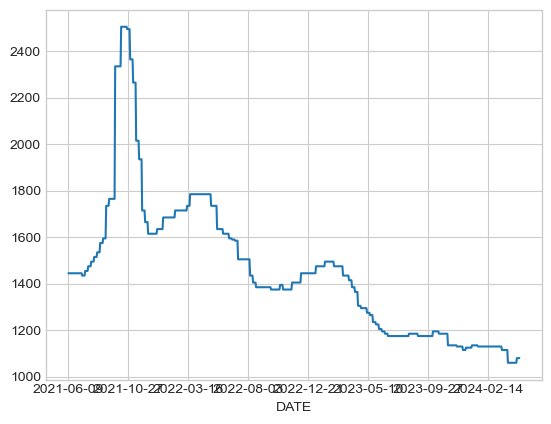

In [236]:
fig = df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'].plot()

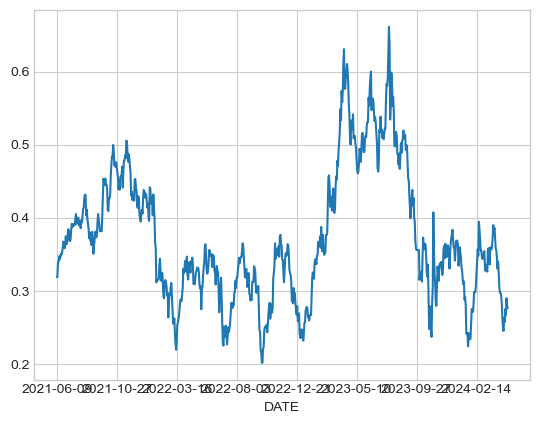

In [237]:
fig = df['ÌèâÍ∑†Ï£ºÍ∞Ä'].plot()

In [238]:
X = df.drop(drop_columns, axis=1) # X, y Î∂ÑÎ¶¨
y = df[['Í∏∞Ï§ÄÍ∞ÄÍ≤©']]

In [239]:
y

Í∏∞Ï§ÄÍ∞ÄÍ≤©
DATE              
2021-06-09  1445.0
2021-06-10  1445.0
2021-06-11  1445.0
2021-06-14  1445.0
2021-06-15  1445.0
...            ...
2024-04-22  1080.0
2024-04-23  1080.0
2024-04-24  1080.0
2024-04-25  1080.0
2024-04-26  1080.0

[753 rows x 1 columns]

In [240]:
X.fillna(0,inplace=True)
X.isna().sum()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 2021-06-09 to 2024-04-26
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò   753 non-null    float64
 1   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò   753 non-null    float64
 2   Close    753 non-null    float64
 3   ÏãúÏû•Ï†ÑÎßùÏßÄÌëú   753 non-null    float64
 4   ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  753 non-null    float64
 5   Î¨¥Ïó≠ÏàòÏßÄ     753 non-null    float64
 6   ÌèâÍ∑†Ï£ºÍ∞Ä     753 non-null    float64
dtypes: float64(7)
memory usage: 47.1+ KB


In [241]:
X

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò        Close  ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò     Î¨¥Ïó≠ÏàòÏßÄ      ÌèâÍ∑†Ï£ºÍ∞Ä
DATE                                                                         
2021-06-09  2407.51  1682.47  1116.890015   49.37    47.48 -19841.0  0.319387
2021-06-10  2436.46  1682.47  1116.410034   49.37    47.48 -19841.0  0.318924
2021-06-11  2452.92  1682.47  1111.260010   49.37    47.48 -19841.0  0.339419
2021-06-14  2498.37  1741.94  1115.550049   49.37    47.48 -19841.0  0.340353
2021-06-15  2496.55  1741.94  1116.319946   49.37    47.48 -19841.0  0.347506
...             ...      ...          ...     ...      ...      ...       ...
2024-04-22  2946.21  1819.96  1373.930054   89.14    85.71 -15554.0  0.275425
2024-04-23  2929.48  1819.96  1378.839966   89.14    85.71 -15554.0  0.266499
2024-04-24  2886.01  1819.96  1370.479980   89.14    85.71 -15554.0  0.290111
2024-04-25  2895.92  1819.96  1376.969971   89.14    85.71 -15554.0  0.280054
2024-04-26  2917.29  1819.96  1371.699951   89.14    85.71 -15554.0  0.276373

[753 rows x 7 columns]

## 2. 8:2 Î°ú train test Î∂ÑÎ¶¨

In [242]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler() # 0 ~ 1
ss = StandardScaler() # ÌèâÍ∑† 0, Î∂ÑÏÇ∞ 1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:746, :] 
X_test = X_ss[746:, :]

y_train = y_ms[:746, :]
y_test = y_ms[746:, :]

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (746, 7) (746, 1)
Testing Shape : (7, 7) (7, 1)


In [243]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÌÉú Î∞è ÌÅ¨Í∏∞ Ï°∞Ï†ï
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, 
                                  (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))

X_test_tensors_f = torch.reshape(X_test_tensors,
                                (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (746, 7) (746, 1)
Testing Shape : (7, 7) (7, 1)


## 3. LSTM Î™®Îç∏ ÏÑ§Ï†ï

In [244]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length, dropout_prob=0.0):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.dropout = nn.Dropout(p=dropout_prob)  # Dropout layer added
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Applying dropout before the final fully connected layer
        out = self.fc(out)
        return out


In [245]:
num_epochs = 3000
learning_rate = 0.0005

input_size=7 # ÏπºÎüº Í∞úÏàò
hidden_size=75 # ÏùÄÎãâÏ∏µ Ïú†Îãõ Í∞úÏàò
num_layers=1 # LSTM Í≥ÑÏ∏µ Í∞úÏàò
dropout_prob = 0.5

num_classes=1 # ÌÅ¥ÎûòÏä§ Í∞úÏàò
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [246]:
for epoch in range(num_epochs) :
    outputs = model.forward(X_train_tensors_f) # Ï†ÑÎ∞©Ìñ• ÌïôÏäµ
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors) # Ïò§Ï∞® Í≥ÑÏÇ∞
    loss.backward() # Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞
    
    optimizer.step() # Ïò§Ï∞® ÏóÖÎç∞Ïù¥Ìä∏
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.09391
Epoch : 100, loss : 0.00627
Epoch : 200, loss : 0.00226
Epoch : 300, loss : 0.00163
Epoch : 400, loss : 0.00121
Epoch : 500, loss : 0.00086
Epoch : 600, loss : 0.00067
Epoch : 700, loss : 0.00058
Epoch : 800, loss : 0.00052
Epoch : 900, loss : 0.00046
Epoch : 1000, loss : 0.00042
Epoch : 1100, loss : 0.00038
Epoch : 1200, loss : 0.00035
Epoch : 1300, loss : 0.00032
Epoch : 1400, loss : 0.00029
Epoch : 1500, loss : 0.00026
Epoch : 1600, loss : 0.00022
Epoch : 1700, loss : 0.00020
Epoch : 1800, loss : 0.00018
Epoch : 1900, loss : 0.00016
Epoch : 2000, loss : 0.00014
Epoch : 2100, loss : 0.00013
Epoch : 2200, loss : 0.00012
Epoch : 2300, loss : 0.00011
Epoch : 2400, loss : 0.00011
Epoch : 2500, loss : 0.00010
Epoch : 2600, loss : 0.00010
Epoch : 2700, loss : 0.00009
Epoch : 2800, loss : 0.00009
Epoch : 2900, loss : 0.00009


In [247]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

## 4. ÏòàÏ∏°Îêú Ï£ºÏãù Í∞íÍ≥º Ïã§Ï†ú Ï£ºÏãù Í∞íÏùÑ ÏãúÍ∞ÅÌôî

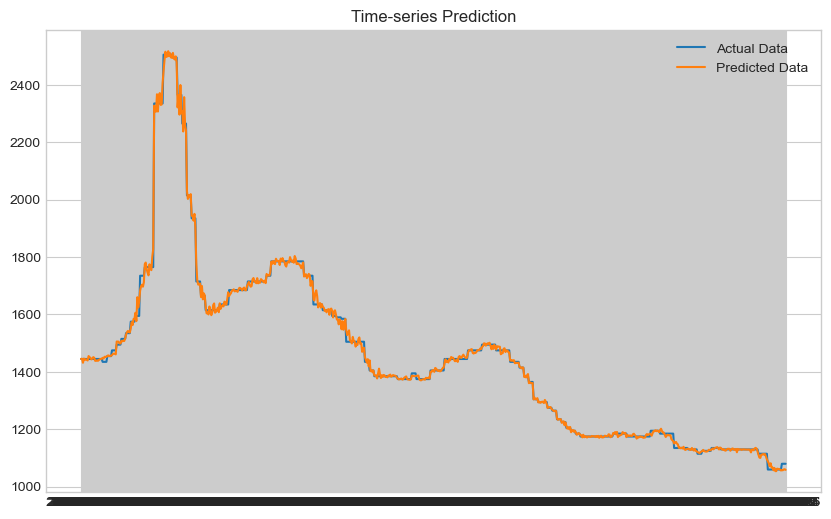

In [248]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()

label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
# plt.axvline(x=datetime(2022,5,1), c='r', linestyle='--')

df['pred'] = predicted
plt.plot(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

## 5. RMSE Í≥ÑÏÇ∞

In [249]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞íÏùÑ NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
predicted = np.array(df['pred'])
actual = np.array(df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'])

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f'RMSE: {rmse}')


RMSE: 12.991128482638347


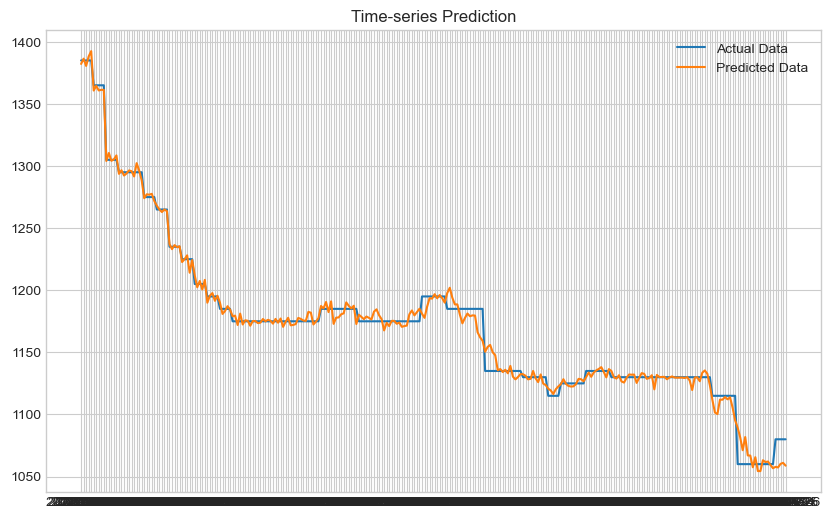

In [250]:
new_df=df.loc['2023-04-01':'2024-04-30']

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

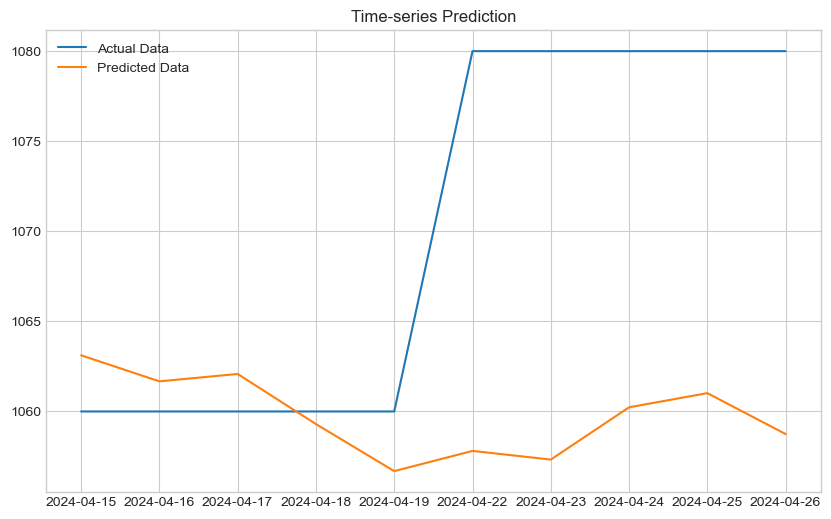

In [251]:
new_df=df.loc['2024-04-15':]

new_df

plt.figure(figsize=(10, 6))

plt.plot(new_df['Í∏∞Ï§ÄÍ∞ÄÍ≤©'], label='Actual Data')
plt.plot(new_df['pred'], label='Predicted Data')

plt.title('Time-series Prediction')
plt.legend()
plt.show()

## 6. Îç∞Ïù¥ÌÑ∞ ÎÇ¥Î≥¥ÎÇ¥Í∏∞

In [252]:
# ÎßùÍ∞ÑLSTM=pd.DataFrame({'DATE':date,'predicted':predicted,'actual':actual})
# ÎßùÍ∞ÑLSTM.set_index('DATE',inplace=True)
# HYBE_ALL_LSTM.to_csv('../../../../result/hybe/[LSTM] HYBE.csv',sep=',')
# HYBE_ALL_LSTM

In [253]:
df

Í¥ëÎ¨ºÏ¢ÖÌï©ÏßÄÏàò  Î©îÏù¥Ï†ÄÍ∏àÏÜçÏßÄÏàò   Ìù¨Ïú†Í∏àÏÜçÏßÄÏàò      ÏóêÎÑàÏßÄÍ¥ëÎ¨ºÏßÄÏàò        Close    Í∏∞Ï§ÄÍ∞ÄÍ≤©  \
DATE                                                                      
2021-06-09  2407.51  2494.11  1682.47  2193.115993  1116.890015  1445.0   
2021-06-10  2436.46  2523.49  1682.47  2227.469874  1116.410034  1445.0   
2021-06-11  2452.92  2519.40  1682.47  2284.482995  1111.260010  1445.0   
2021-06-14  2498.37  2567.59  1741.94  2315.536776  1115.550049  1445.0   
2021-06-15  2496.55  2564.67  1741.94  2315.536776  1116.319946  1445.0   
...             ...      ...      ...          ...          ...     ...   
2024-04-22  2946.21  2545.26  1819.96  3154.139607  1373.930054  1080.0   
2024-04-23  2929.48  2546.98  1819.96  3081.062858  1378.839966  1080.0   
2024-04-24  2886.01  2500.92  1819.96  3043.299367  1370.479980  1080.0   
2024-04-25  2895.92  2521.51  1819.96  3021.949758  1376.969971  1080.0   
2024-04-26  2917.29  2545.06  1819.96  3037.851922  1371.699951  1080.0   

            ÏãúÏû•Ï†ÑÎßùÏßÄÌëú  ÏàòÍ∏âÏïàÏ†ïÌôîÏßÄÏàò  ÏàòÏ∂ú Ï§ëÎüâ  ÏàòÏ∂ú Í∏àÏï°  ...    ÏóêÏΩîÌîÑÎ°úÎπÑÏó†      ÏóêÏΩîÌîÑÎ°ú   skÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò  \
DATE                                       ...                                 
2021-06-09   49.37    47.48    0.3   15.0  ...  0.000000  0.002092  0.889477   
2021-06-10   49.37    47.48    0.3   15.0  ...  0.004433  0.002511  0.863166   
2021-06-11   49.37    47.48    0.3   15.0  ...  0.007149  0.000152  0.889477   
2021-06-14   49.37    47.48    0.3   15.0  ...  0.007209  0.000455  0.905267   
2021-06-15   49.37    47.48    0.3   15.0  ...  0.008213  0.000268  0.963163   
...            ...      ...    ...    ...  ...       ...       ...       ...   
2024-04-22   89.14    85.71    4.1   51.0  ...  0.469207  0.380355  0.036372   
2024-04-23   89.14    85.71    4.1   51.0  ...  0.453666  0.380355  0.024605   
2024-04-24   89.14    85.71    4.1   51.0  ...  0.482357  0.380355  0.033163   
2024-04-25   89.14    85.71    4.1   51.0  ...  0.454861  0.399120  0.019791   
2024-04-26   89.14    85.71    4.1   51.0  ...  0.459643  0.390736  0.015512   

                ÏóòÏï§ÏóêÌîÑ    ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨  Î°ØÎç∞ÏóêÎÑàÏßÄÎ®∏Ìã∞Î¶¨ÏñºÏ¶à   ÏÜîÎ∏åÎ†àÏù∏ÌôÄÎî©Ïä§      ÌèâÍ∑†Ï£ºÍ∞Ä  ÏàòÍ∏âÏÉÅÌÉú  \
DATE                                                                   
2021-06-09  0.000000  0.000000    0.328393  0.285927  0.319387  ÏàòÍ∏âÏïàÏ†ï   
2021-06-10  0.006937  0.002379    0.322835  0.281459  0.318924  ÏàòÍ∏âÏïàÏ†ï   
2021-06-11  0.012713  0.006423    0.338583  0.272524  0.339419  ÏàòÍ∏âÏïàÏ†ï   
2021-06-14  0.023114  0.006900    0.348773  0.285182  0.340353  ÏàòÍ∏âÏïàÏ†ï   
2021-06-15  0.012300  0.004998    0.354331  0.281459  0.347506  ÏàòÍ∏âÏïàÏ†ï   
...              ...       ...         ...       ...       ...   ...   
2024-04-22  0.263831  0.615077    0.119963  0.422189  0.275425  Í≥µÍ∏âÍ≥ºÏûâ   
2024-04-23  0.255420  0.594855    0.140806  0.419211  0.266499  Í≥µÍ∏âÍ≥ºÏûâ   
2024-04-24  0.291067  0.610744    0.150533  0.483246  0.290111  Í≥µÍ∏âÍ≥ºÏûâ   
2024-04-25  0.267836  0.600151    0.148680  0.484736  0.280054  Í≥µÍ∏âÍ≥ºÏûâ   
2024-04-26  0.279051  0.595818    0.129226  0.481757  0.276373  Í≥µÍ∏âÍ≥ºÏûâ   

                   pred  
DATE                     
2021-06-09  1445.551270  
2021-06-10  1445.516113  
2021-06-11  1431.807373  
2021-06-14  1446.421997  
2021-06-15  1441.836792  
...                 ...  
2024-04-22  1057.810181  
2024-04-23  1057.329102  
2024-04-24  1060.231445  
2024-04-25  1061.017090  
2024-04-26  1058.745972  

[753 rows x 26 columns]

In [254]:
df.to_csv('../../results/ÎßùÍ∞Ñresult.csv',encoding='cp949')